In [2]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [13]:
from scipy import signal
import glob
import re
import pandas as pd

In [30]:
def filter_data(sensordata, fs=200, fc=5):
    sensordata_filt = np.zeros(sensordata.shape)
    
    w = fc / (fs / 2)
    b, a = signal.butter(fc,w, 'low')
    
    sensordata_filt[:,0] = signal.filtfilt(b,a, sensordata[:,0])
    sensordata_filt[:,1] = signal.filtfilt(b,a, sensordata[:,1])
    sensordata_filt[:,2] = signal.filtfilt(b,a, sensordata[:,2])
    
    return sensordata_filt

In [5]:
folders =glob.glob(r'./Data/Smartphone1/*')

In [81]:
for folder in folders:
#     print(folder)
    name = re.split('/',folder)
#     print(name)
    experiment_name = name[-1]
#     print(experiment_name)
    if experiment_name=='subject211_impaired01':
        print(experiment_name)
        gyr_file = glob.glob(folder+'/Gyroscope.csv')
        acc_file = glob.glob(folder+'/Accelerometer.csv')
        print(gyr_file)
        print(acc_file)
        data_gyr = pd.read_csv(gyr_file[0], sep=",",header=None)
        gyr = data_gyr.iloc[2:,1:4].values.astype(float)
        data_acc = np.loadtxt(acc_file[0], delimiter=',', skiprows=1)
        acc = data_acc[:,1:4]
        time = data_acc[:,0]
        sampling_frequency = np.round(len(time)/(time[-1]))
        print(sampling_frequency)

In [82]:
filter_acc =filter_data(acc,fs=sampling_frequency,fc=4)
filter_gyr = filter_data(gyr, fs=sampling_frequency, fc=4)

In [83]:
plt.plot(gyr[:,0])
plt.plot(filter_gyr[:,0])


In [79]:
def cut_data(acc_filt, gyr_filt, freq):
    acc_abs = np.linalg.norm(acc_filt,axis=1)
    

    peaks, _ = signal.find_peaks(acc_abs,height=11, distance=freq/2)
    diff_peaks =np.diff(peaks)
    gap1  = np.argmax(diff_peaks[:20])
    gap2  = np.argmax(diff_peaks[-10:])
    gap2  = int(gap2 + np.shape(diff_peaks)-10)

    
    acc_cut = acc_filt[peaks[gap1+1]:peaks[gap2],:]
    gyr_cut = gyr_filt[peaks[gap1+1]:peaks[gap2],:]
    
    return acc_cut, gyr_cut

In [84]:
acc_cut, gyr_cut = cut_data(filter_acc,filter_gyr,sampling_frequency)

<IPython.core.display.Javascript object>


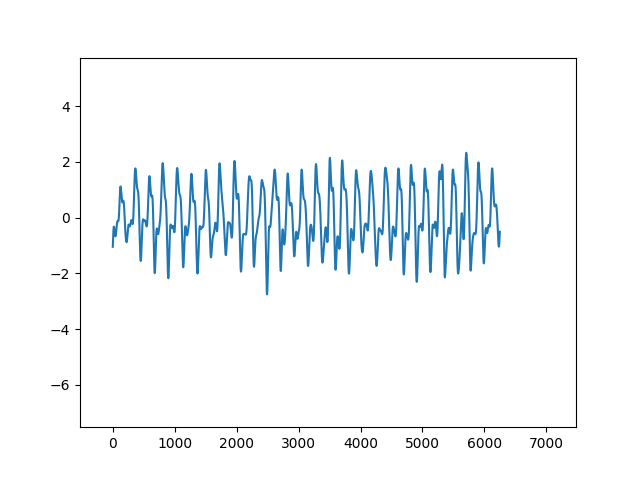

In [87]:
plt.plot(gyr_cut[:,1])
# plt.plot(filter_acc[:,1])
# plt.plot(abs_acc)